In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.neighbors import (KNeighborsRegressor,
                               KNeighborsClassifier)
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   LabelEncoder)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from PIL import Image

In [369]:
data = pd.read_csv('data/heart_disease_uci.csv')

In [370]:
data.head()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [372]:
#Находим количестов нулевых значений в столбцах
colls_null_proc =data.isnull().mean() * 100
print(colls_null_proc)

id           0.000000
age          0.000000
sex          0.000000
origin       0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [373]:
data['ca'].describe()

count    309.000000
mean       0.676375
std        0.935653
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [374]:
#Видим что в столбцaх 'slope' и 'thal' более 30% пропусков, удалим их
data = data.drop(['slope', 'thal'], axis=1)

In [375]:
#Создаём словарь для заполнения пропусов 
#Количественные признаки заполняем средним значением по столбцу
fillna_dict = {'trestbps': data['trestbps'].median(),
               'chol': data['chol'].median(),
               'fbs': data['fbs'].mode()[0],
               'restecg': data['restecg'].mode()[0],
               'thalch': data['thalch'].median(),
               'exang': data['exang'].mode()[0],
               'oldpeak': data['oldpeak'].median()
               }
#Заполняем пропуски
data = data.fillna(fillna_dict)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11220\743514103.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(fillna_dict)


In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  ca        309 non-null    float64
 13  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(4)
memory usage: 88.2+ KB


In [377]:
#Удалим столбец id
data = data.drop('id', axis=1
)

In [378]:
#Построим гистограммы и боксплоты для числовых признаков чтобы выявить выбросы

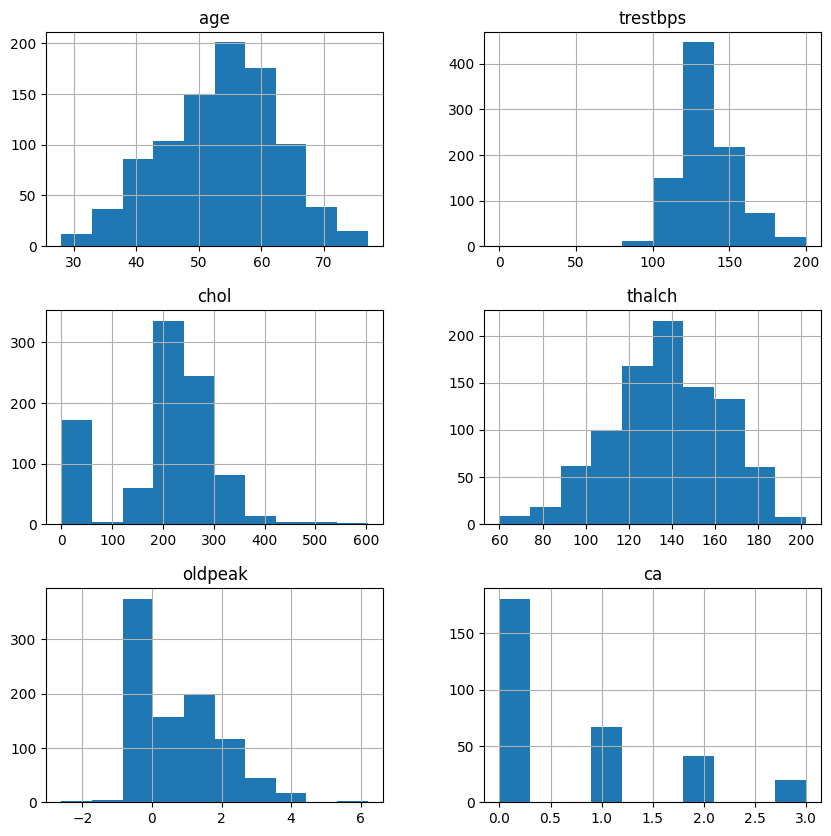

In [379]:
df = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']]
df.hist(figsize=(10,10))
plt.show()

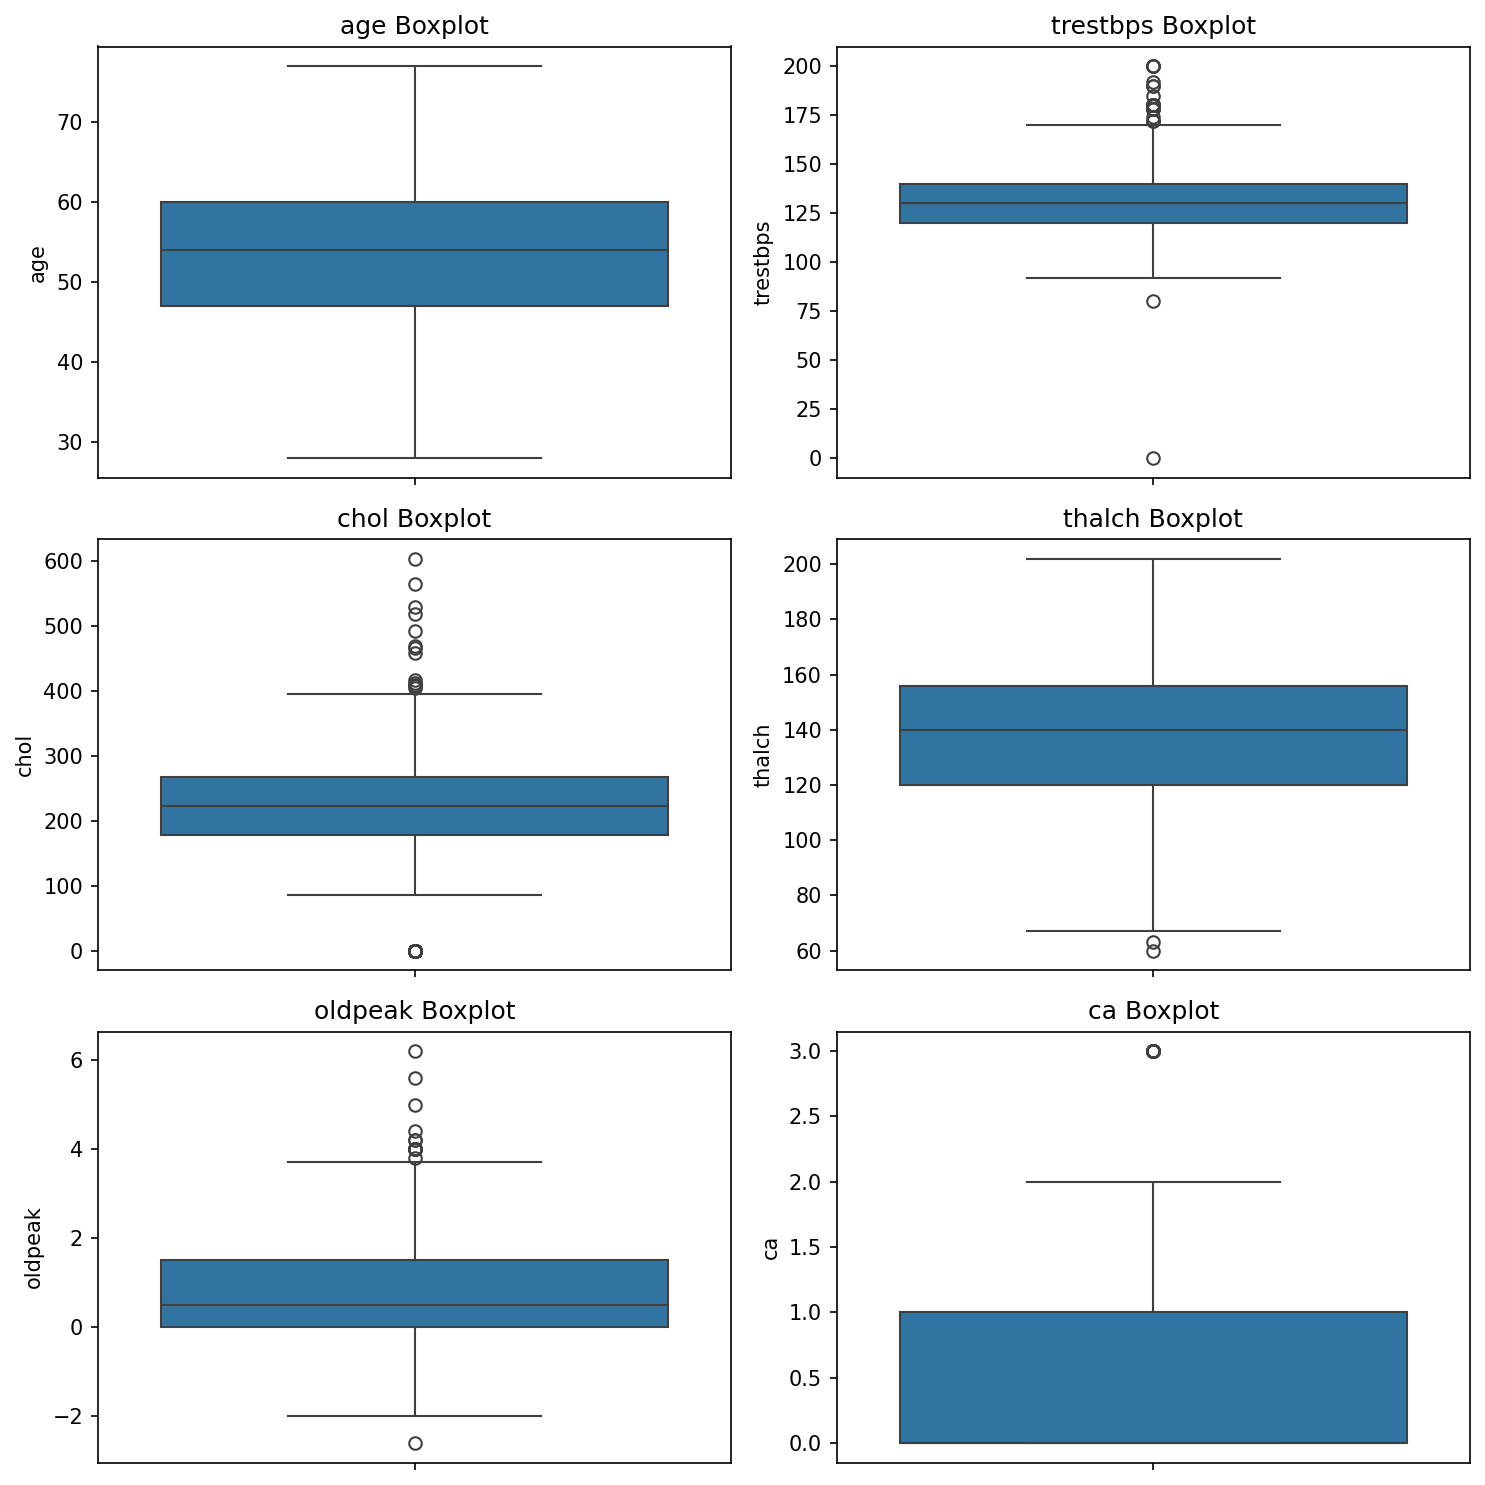

In [380]:
#Задаём цикл для построения боксплотов
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
fig, ax = plt.subplots(3,2, figsize=(10,10), dpi=150)

ax=ax.flatten()

for i in columns:
  sns.boxplot(df[i], ax=ax[columns.index(i)])
  ax[columns.index(i)].set_title(f"{i} Boxplot")

plt.tight_layout()

In [381]:
#Необходимо очистить выбросы по признакам 'trestbps', 'chol', 'oldpeak' и 'ca'
clean_list = ['trestbps', 'chol', 'oldpeak', 'ca']

In [382]:
#Применим функцию очистки по методу Тьюки
#Задаём функцию для вызова метода Тьюки
def clean_outliers(data, feature, n_iqr=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * n_iqr)
    upper_bound = quartile_3 + (iqr * n_iqr)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return cleaned

In [383]:
#Вызываем функцию для признаков
cleaned_data = data.copy()
for elem in clean_list:
    cleaned_data = clean_outliers(cleaned_data, elem)


In [384]:
cleaned_data['num'].value_counts()
#Видим что признак имеет здоровых людей(0)
#И 4 степени заболевания


num
0    155
1     51
2     29
3     26
4      7
Name: count, dtype: int64

In [385]:
#Упростим признак который мы собираемся предсказывать
#Здоровых людей оставим как есть(обозначены как 0)
#Больных пациентов обозначим как 1(независимо от степени заболевания)
cleaned_data['num'] = cleaned_data['num'].apply(lambda x: 0 if x == 0 else 1)

#ПРЕДОБРАЬОТКА ДАННЫХ

In [386]:
#Разделим все данные на категориальные и числовые
cleaned_data.columns

Index(['age', 'sex', 'origin', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'ca', 'num'],
      dtype='object')

In [387]:
cleaned_data.head()

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0.0,0
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,2.0,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0.0,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0.0,0
5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,0.0,0


In [388]:
cat_cols = ['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'ca']
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
all_features=cat_cols+num_cols

In [389]:
X=cleaned_data[all_features]

In [390]:
#Определяем таргет для обучения модели
y = cleaned_data["num"]

In [391]:
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), num_cols),
    ("ohe", OneHotEncoder(drop="first"), cat_cols)
])

In [392]:
knn_pipeline=Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=k, n_jobs=8))])

In [393]:
#делим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#ПОДБЕРЁМ ЧИСЛО СОСЕДЕЙ

In [394]:
#Оценим точность предсказания при разном количестве соседей по метрике качества accuracy_score
accuracy_scores=[] #список для записи метрики качества для каждого к

for k in k_neighbors:
  knn_pipeline=Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=k, n_jobs=8))]) #пайплайн с предобработкой и алгоритмом
  knn_pipeline.fit(X_train, y_train) #знакомим алгоритм с данными
  y_test_pred = knn_pipeline.predict(X_test) #предсказываем тагрет в тестовых данных
  accuracy = accuracy_score(y_test, y_test_pred) #считаем метрику качества сравнивая изначальное значение таргета в тестовых данных (он у нас есть, посмотрите еще раз как мы разбиваем данные) с таргетом предсказанным
  accuracy_scores+=[accuracy]

  print(k, accuracy)

1 0.6851851851851852
2 0.7222222222222222
3 0.7222222222222222
5 0.7962962962962963
7 0.8333333333333334
10 0.8148148148148148
25 0.7962962962962963
31 0.7777777777777778
51 0.7962962962962963
71 0.7777777777777778
91 0.8148148148148148
101 0.7777777777777778
201 0.6111111111111112


<Axes: >

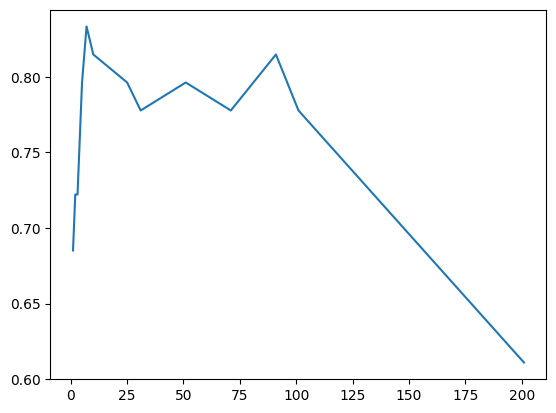

In [395]:
sns.lineplot(x=k_neighbors, y=accuracy_scores)

In [ ]:
#Видим что максимальная точность предсказания достигается при k=7

In [400]:
#Изменим количество соседей в пайплайне на 7
knn_pipeline=Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=7, n_jobs=8))])

In [401]:
knn_pipeline.fit(X_train, y_train) #знакомим алгоритм с данными

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'origin', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'ca'])])),
                ('knn', KNeighborsClassifier(n_jobs=8, n_neighbors=7))])

In [403]:
#Получаем предсказание для трениовочной выборке при k=7
y_test_pred = knn_pipeline.predict(X_test)

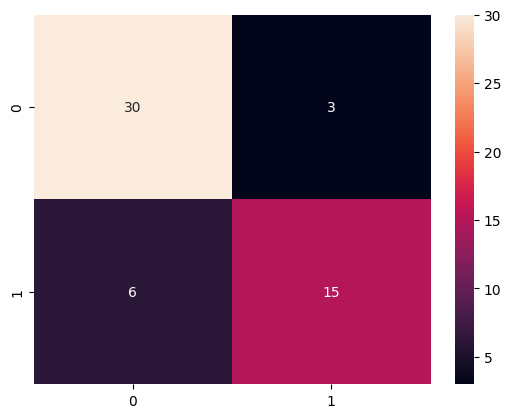

In [404]:
confussion= confusion_matrix(y_test, y_test_pred) # используем метрику confussion matrix для тестовой выборки

sns.heatmap(confussion, annot=True)
plt.show()

In [409]:
#Проведём те же метрики для тренировочной выборки
knn_pipeline=Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=7, n_jobs=8))]) #пайплайн с предобработкой и алгоритмом
knn_pipeline.fit(X_train, y_train) #знакомим алгоритм с данными
y_train_pred = knn_pipeline.predict(X_train) #предсказываем тагрет в тестовых данных
train_accuracy = accuracy_score(y_train, y_train_pred) #считаем метрику качества 
print(train_accuracy)

0.8457943925233645


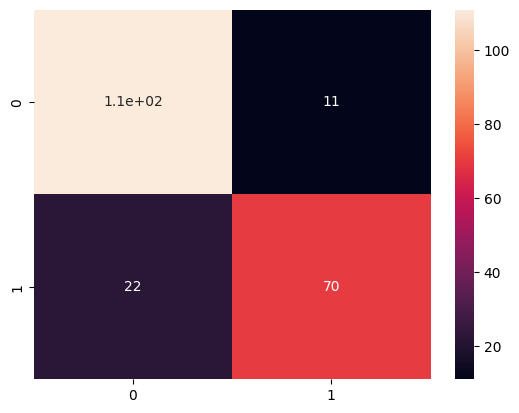

In [410]:
confussion= confusion_matrix(y_train, y_train_pred) #помимо accuracy, мы используем confussion matrix

sns.heatmap(confussion, annot=True)
plt.show()

In [ ]:
#Видим что предсказания являются достаточно точными как для тестовой так и для тренировочной выборки 